In [43]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
img = cv2.imread(r"C:\Users\USER\Documents\image classifier\shahrukh khan\Shahrukhkhan_11.jpg")

In [45]:
img.shape

(280, 218, 3)

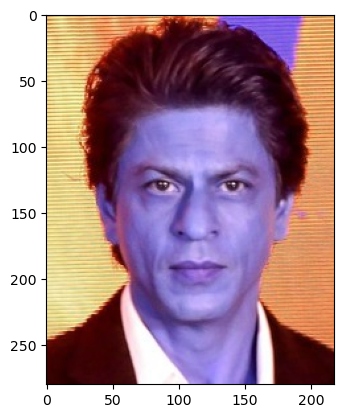

In [46]:
plt.imshow(img)

In [47]:
grey = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
grey.shape

(280, 218)

In [48]:
grey

array([[169, 177, 183, ..., 185, 190, 188],
       [107, 114, 120, ..., 121, 131, 130],
       [188, 191, 197, ..., 153, 151, 152],
       ...,
       [  7,   7,   8, ...,   5,   5,   5],
       [  7,   7,   7, ...,   4,   7,   7],
       [  7,   7,   7, ...,   4,   7,   7]], dtype=uint8)

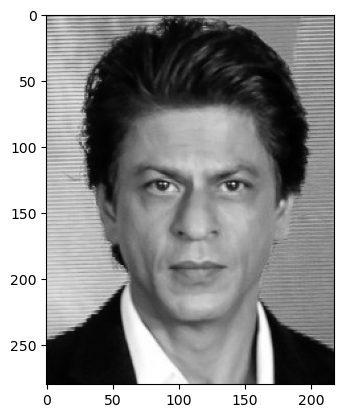

In [49]:
plt.imshow(grey , cmap='grey')

In [50]:
face_cascade = cv2.CascadeClassifier(r"C:\Users\USER\Documents\image classifier\opencv\haarcascade\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(r"C:\Users\USER\Documents\image classifier\opencv\haarcascade\haarcascade_eye.xml")

In [51]:
faces = face_cascade.detectMultiScale(grey , 1.3,5)
faces

array([[ 38,  72, 152, 152]], dtype=int32)

In [52]:
x,y,w,h = faces[0]
x,y,w,h

(np.int32(38), np.int32(72), np.int32(152), np.int32(152))

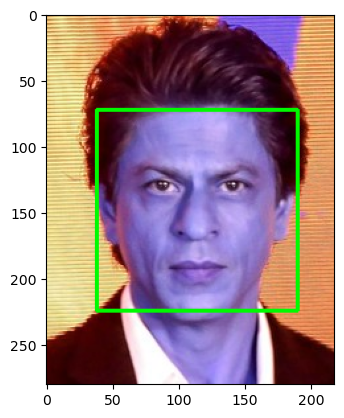

In [53]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,250,0),2)
plt.imshow(face_img)

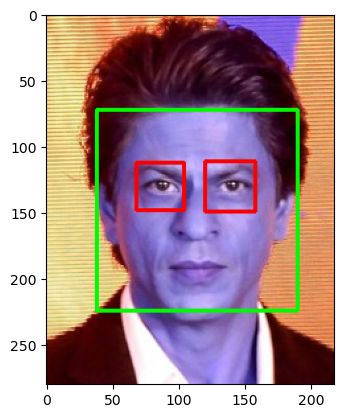

In [54]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,250,0),2)
    roi_gray = grey[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(250,0,0),2)
        

plt.imshow(face_img, cmap='gray')
plt.show()

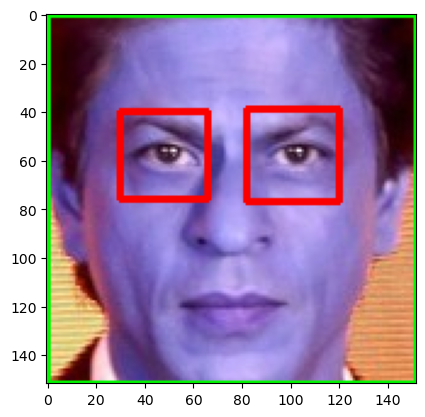

In [55]:
plt.imshow(roi_color , cmap= "gray")

In [56]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [1]:
cropped_image = get_cropped_image_if_2_eyes(r'C:\Users\USER\Documents\image classifier\shahrukh khan\Shahrukhkhan_12.jpg')
plt.imshow(cropped_image)

NameError: name 'get_cropped_image_if_2_eyes' is not defined

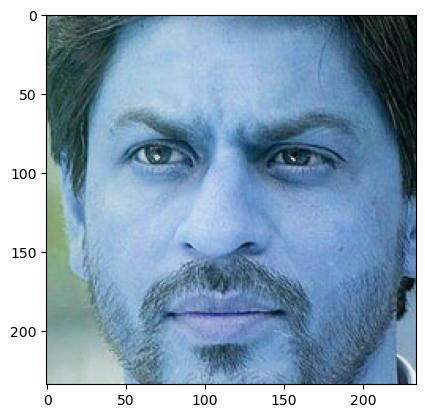

In [58]:
cropped_image = get_cropped_image_if_2_eyes(r'C:\Users\USER\Documents\image classifier\shahrukh khan\Shahrukhkhan_2.jpg')
plt.imshow(cropped_image)

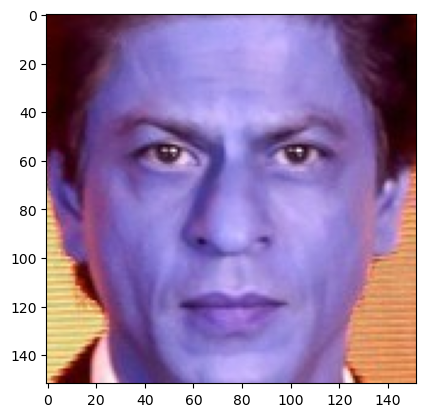

In [59]:
cropped_image = get_cropped_image_if_2_eyes(r'C:\Users\USER\Documents\image classifier\shahrukh khan\Shahrukhkhan_11.jpg')
if cropped_image is not None:
    plt.imshow(cropped_image)
else:
    print("Upload clear image with proper face.")

In [60]:
import os

In [331]:
img_dir = r'C:/Users/USER/Documents/image classifier/atif aslam'
crop_folder = r'C:/Users/USER/Documents/image classifier/cropped/croped_atif_aslam'
celebrity_name = 'atif_aslam'
count = 1
for entry in os.scandir(img_dir):
    cropped_image = get_cropped_image_if_2_eyes(entry.path)
    if cropped_image is not None:
        cropped_file_name = celebrity_name + str(count) + ".png"
        cropped_file_path = crop_folder + "/" + cropped_file_name
        cv2.imwrite(cropped_file_path , cropped_image)

        count+=1

In [61]:
import pywt

In [62]:
def w2d(img , mode = 'haar' , level = 1):
    array = img
    Array = cv2.cvtColor(array , cv2.COLOR_BGR2GRAY)
    imArray = np.float32(Array)
    imArray /= 255;
    coeffs = pywt.wavedec2(imArray , mode , level=level)
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    imArray_H = pywt.waverec2(coeffs_H , mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)

    return imArray_H

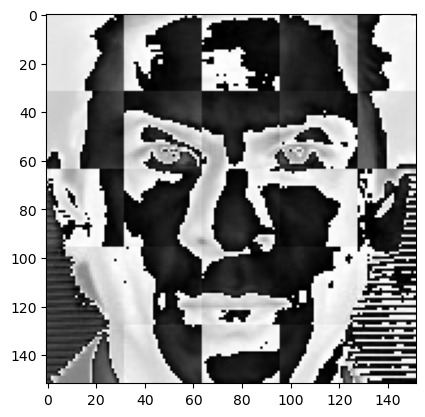

In [64]:
im_har = w2d(cropped_image , 'db1' , 5)
plt.imshow(im_har , cmap = 'gray')

In [65]:
celebrity_file_names_dict = {}
cropped_folders = ['C:/Users/USER/Documents/image classifier/cropped/croped_shahrukh_khan','C:/Users/USER/Documents/image classifier/cropped/croped_atif_aslam']
for folder in cropped_folders:
    celebrity_name = folder.split('_')[-2]
    file_list = []
    for entry in os.scandir(folder):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'shahrukh': ['C:/Users/USER/Documents/image classifier/cropped/croped_shahrukh_khan\\shahrukh_khan1.png',
  'C:/Users/USER/Documents/image classifier/cropped/croped_shahrukh_khan\\shahrukh_khan10.png',
  'C:/Users/USER/Documents/image classifier/cropped/croped_shahrukh_khan\\shahrukh_khan11.png',
  'C:/Users/USER/Documents/image classifier/cropped/croped_shahrukh_khan\\shahrukh_khan12.png',
  'C:/Users/USER/Documents/image classifier/cropped/croped_shahrukh_khan\\shahrukh_khan13.png',
  'C:/Users/USER/Documents/image classifier/cropped/croped_shahrukh_khan\\shahrukh_khan14.png',
  'C:/Users/USER/Documents/image classifier/cropped/croped_shahrukh_khan\\shahrukh_khan15.png',
  'C:/Users/USER/Documents/image classifier/cropped/croped_shahrukh_khan\\shahrukh_khan16.png',
  'C:/Users/USER/Documents/image classifier/cropped/croped_shahrukh_khan\\shahrukh_khan17.png',
  'C:/Users/USER/Documents/image classifier/cropped/croped_shahrukh_khan\\shahrukh_khan18.png',
  'C:/Users/USER/Documents/im

In [66]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count += 1
class_dict

{'shahrukh': 0, 'atif': 1}

In [67]:
X , y = [] , []
for all_celebrity_names,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img , (32 ,32))
        img_har = w2d(cropped_image , 'db1' , 5)
        scalled_har_img = cv2.resize(img_har , (32 ,32))
        combined_image = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_har_img.reshape(32*32,1)))
        X.append(combined_image)
        y.append(class_dict[all_celebrity_names])

In [68]:
len(X)

71

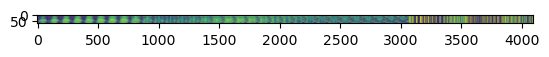

In [69]:
plt.imshow(X)

In [70]:
X[0]

data = pd.DataFrame()

array([[ 64],
       [  4],
       [  4],
       ...,
       [213],
       [215],
       [215]], dtype=uint8)

In [71]:
len(X[0])

4096

In [72]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(71, 4096)

In [73]:
X[0]

array([ 64.,   4.,   4., ..., 213., 215., 215.])

In [186]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [187]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 0)

In [188]:
pipe = Pipeline([('scaler' , StandardScaler()),('svc', SVC(probability=True))])

In [189]:
pipe.fit(X_train , y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(probability=True))])

In [190]:
pipe.score(X_test , y_test)

0.8888888888888888

In [191]:
y_pred = pipe.predict(X_test)

In [192]:
y_test

[0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1]

In [193]:
y_pred

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [194]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.75      0.86         8

    accuracy                           0.89        18
   macro avg       0.92      0.88      0.88        18
weighted avg       0.91      0.89      0.89        18



In [195]:
from sklearn.model_selection import GridSearchCV

In [196]:
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto']
}

In [197]:
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [198]:
grid.best_params_

{'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}

In [199]:
grid.best_score_

np.float64(0.9018181818181817)

In [200]:
grid.predict(X_test)

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1])

In [201]:
grid.predict_proba(X_test)

array([[0.88243531, 0.11756469],
       [0.91985904, 0.08014096],
       [0.05113815, 0.94886185],
       [0.56459822, 0.43540178],
       [0.53479224, 0.46520776],
       [0.06580008, 0.93419992],
       [0.76595532, 0.23404468],
       [0.05398718, 0.94601282],
       [0.61976272, 0.38023728],
       [0.24613012, 0.75386988],
       [0.31493887, 0.68506113],
       [0.93458101, 0.06541899],
       [0.87880289, 0.12119711],
       [0.77474478, 0.22525522],
       [0.91452226, 0.08547774],
       [0.20683118, 0.79316882],
       [0.39416501, 0.60583499],
       [0.32143664, 0.67856336]])

In [128]:
import joblib

In [202]:
joblib.dump(grid,'class_image_model.pkl')

['class_image_model.pkl']

In [203]:
import json

In [204]:
with open('model_image.json' , 'w') as f:
    f.write(json.dumps(class_dict))